# Исследование поведения пользователей сервиса аренды самокатов

**Заказчик**

Cервис аренды самокатов GoFast

**Цель проекта**

Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.


**Входные данные**

В основных данных есть информация о пользователях, их поездках и подписках, а именно:

o Пользователи — users_go.csv:\
  user_id - уникальный идентификатор пользователя\
  name - имя пользователя\
  age - возраст\
  city - город\
  subscription_type - тип подписки (free, ultra)
  
o Поездки — rides_go.csv:\
  user_id - уникальный идентификатор пользователя\
  distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)\
  duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до    момента, как он нажал кнопку «Завершить поездку»\
  date - дата совершения поездки

o Подписки — subscriptions_go.csv:\
  subscription_type - тип подписки\
  minute_price - стоимость одной минуты поездки по данной подписке\
  start_ride_price - стоимость начала поездки\
  subscription_fee - стоимость ежемесячного платежа


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:\
•	без подписки\
   o	абонентская плата отсутствует;\
   o	стоимость одной минуты поездки — 88 рублей;\
   o	стоимость старта (начала поездки) — 5050 рублей;\
•	с подпиской Ultra\
   o	абонентская плата — 199199 рублей в месяц;\
   o	стоимость одной минуты поездки — 66 рублей;\
   o	стоимость старта — бесплатно.



**Ход исследования**

Исследование пройдёт в несколько этапов:\
. обзор данных;\
. предобработка данных;\
. исследовательский анализ данных;\
. расчеты;\
. проверка гипотез.

In [1]:
# импортируем библиотеку pandas
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn

### Шаг 1. Загрузка данных

In [2]:
# cчитаваем данные из csv-файла в датафреймы и сохраняем в переменные
users_go = pd.read_csv('C:/Users/nata/Downloads/users_go.csv')
rides_go = pd.read_csv('C:/Users/nata/Downloads/rides_go.csv')
subscriptions_go = pd.read_csv('C:/Users/nata/Downloads/subscriptions_go.csv')

In [3]:
# выводим таблицы с помощью функции display
display(users_go)
display(rides_go)
display(subscriptions_go)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
# выведем основную информацию о датафреймах с помощью метода info()
users_go.info()
print()
rides_go.info()
print()
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   C

**Промежуточные итоги:** \
После изучения общей информации данных (данные сервиса аренды самокатов GoFast) выяснили:\
. данные представлены тремя таблицами (информация о пользователях, их поездках и подписках);\
. все данные заполнены (т.е. в столбцах нет пропущенных значений);
. у части данных некорретный тип данных.

### Шаг 2. Предобработка данных

In [5]:
# преобразуем типы данных столбца 'date' у датафрейма rides_go
rides_go['date'] = pd.to_datetime(rides_go['date'])

In [6]:
# cоздадим новый столбец с номером месяца на основе столбца 'date' у датафрейма rides_go
rides_go['month'] = rides_go['date'].dt.month

In [7]:
# дополнительно проверим за какие года представлены данные
rides_go['year'] = rides_go['date'].dt.year
rides_go['year'].unique()

array([2021])

In [8]:
# выведем количество пропущенных значений для каждого столбца датафрейма users_go
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [9]:
# выведем количество пропущенных значений для каждого столбца датафрейма rides_go
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64

In [10]:
# выведем количество пропущенных значений для каждого столбца датафрейма subscriptions_go
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [11]:
# выведем количество строк-дубликатов в данных users_go
users_go.duplicated().sum()

31

In [12]:
# удалим строки-дублиаты 
users_go = users_go.drop_duplicates()

In [13]:
# выведем количество строк-дубликатов в данных rides_go
rides_go.duplicated().sum()

0

In [14]:
# каждое значение из столбца округляем с помощью «потолка» 
rides_go[['distance', 'duration']] = (
    np.ceil(rides_go[['distance', 'duration']])) 

**Промежуточные итоги:** \
. преобразовали тип данных у столбца 'data' датафрейма rides_go, т.е. заменили строковой тип данных на более удобный тип для даты;\
. в исходный датасет добавили новый столбц - месяц совершения поездки;\
. проверили на наличие пропущенных значений и дубликатов в датафреймах, обработали их.

### Шаг 3. Исследовательский анализ данных

Визуализируем общую информацию о пользователях и поездках:

Text(0, 0.5, 'Название города')

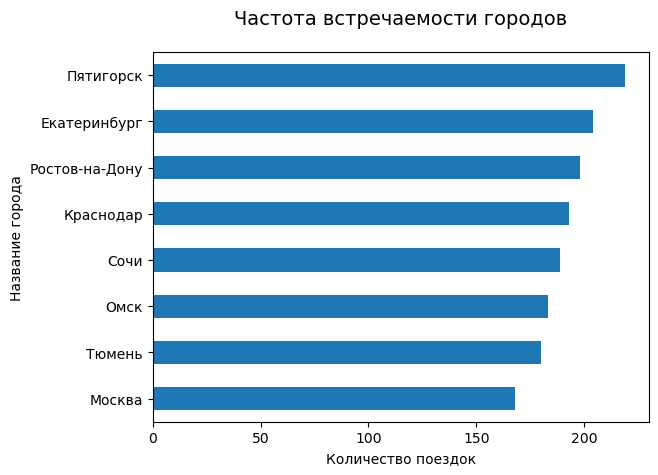

In [15]:
# частота встречаемости городов
users_go['city'].value_counts(ascending=True).plot(kind='barh')
plt.title("Частота встречаемости городов", fontsize=14, pad=20)
plt.xlabel("Количество поездок")
plt.ylabel("Название города")

In [16]:
users_go['city'].value_counts(ascending=False)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

Text(0, 0.5, 'тип подписки')

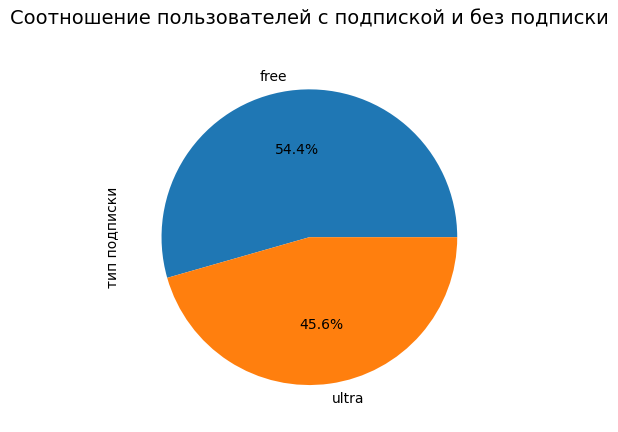

In [17]:
# соотношение пользователей с подпиской и без подписки
users_go['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Соотношение пользователей с подпиской и без подписки", fontsize=14, pad=20)
plt.ylabel("тип подписки")

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

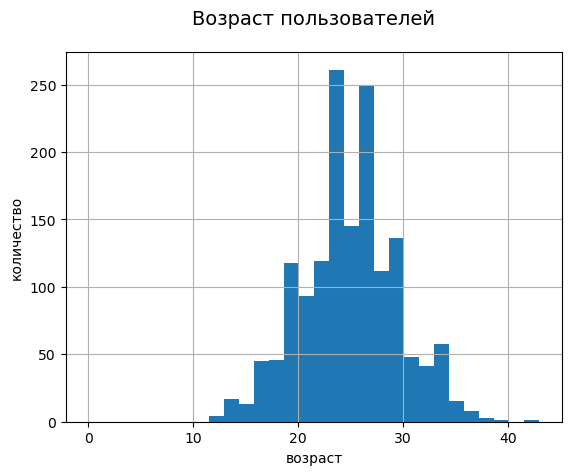

In [18]:
# возраст пользователей
# построим гистограмму
users_go['age'].hist(bins=30, range = (0, 43))
plt.title("Возраст пользователей", fontsize=14, pad=20)
plt.xlabel("возраст")
plt.ylabel("количество")
users_go['age'].describe()

count    18068.000000
mean      3071.159841
std       1116.831548
min          1.000000
25%       2543.750000
50%       3134.000000
75%       3777.000000
max       7212.000000
Name: distance, dtype: float64

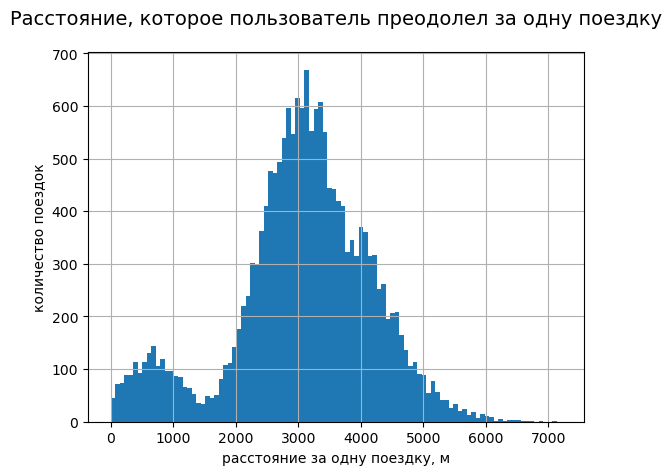

In [19]:
# расстояние, которое пользователь преодолел за одну поездку
# построим гистограмму
rides_go['distance'].hist(bins=100, range = (0, 7211))
plt.title("Расстояние, которое пользователь преодолел за одну поездку", fontsize=14, pad=20)
plt.xlabel("расстояние за одну поездку, м")
plt.ylabel("количество поездок")
rides_go['distance'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

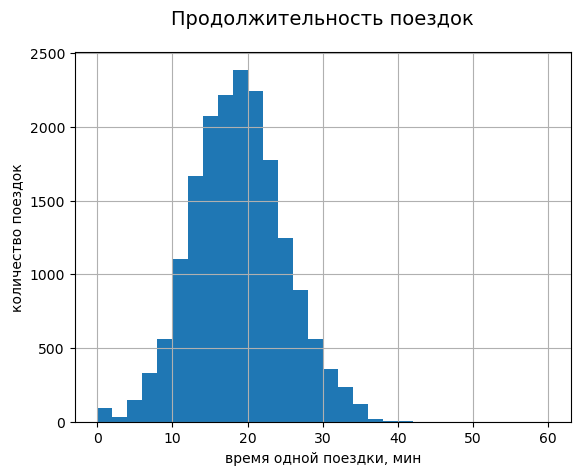

In [20]:
# продолжительность поездок
# построим гистограмму
rides_go['duration'].hist(bins=30, range = (0, 60))
plt.title("Продолжительность поездок", fontsize=14, pad=20)
plt.xlabel("время одной поездки, мин")
plt.ylabel("количество поездок")
rides_go['duration'].describe()

**Промежуточные итоги:** \
После визуализации общей информации о пользователях и поездках выделим следующее:\
. данные сервиса представлены по восьми городам. И город Пятгорск, в котором чаще всего пользуются этим сервисом;\
. пользователей без подписки больше, чем с подпиской (это 54,4% от обещго числа);\
. возраст пользователей - это подростки от 12 лет и люди до 43 (высоким спросом этот сервис пользуется у молодых людей возрастом 25 лет);\
. самые большие расстояния, которое пользователи преодолевают за одну поездку, на этом виде транспорта в районе 7 км, а чаще всего это поездки исчисляются 3 км.\
. продолжительность поездок в среднем занимает 17 миут, но есть поездки по 40 минут, но их гораздо меньше.

### Шаг 4. Объединение данных

In [21]:
# объединим данные о пользователях, поездках и подписках в один датафрейм
general_go_fast = (users_go
                   .merge(rides_go, on='user_id', how='left') 
                   .merge(subscriptions_go, on='subscription_type', how='left') 
                  )                

In [22]:
print('Количество строк у объединенной таблицы general_go_fast равно', len(general_go_fast))
print('Количество строк у изначальных таблиц users_go, rides_go, соответственно', len(general_go_fast), 'и', len(rides_go))


Количество строк у объединенной таблицы general_go_fast равно 18068
Количество строк у изначальных таблиц users_go, rides_go, соответственно 18068 и 18068


In [23]:
# создадим датафрейм c данными о пользователях без подписки из датафрейма general_go_fast
general_go_fast_free =  general_go_fast[general_go_fast['subscription_type'] == 'free']

In [24]:
# создадим датафрейм c данными о пользователях с подпиской из датафрейма general_go_fast
general_go_fast_ultra =  general_go_fast[general_go_fast['subscription_type'] == 'ultra']

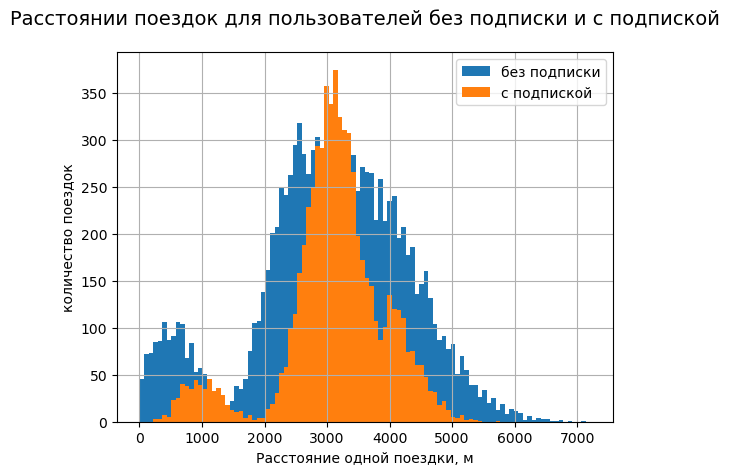

In [25]:
# построим гистограммы (визуализируем информацию о расстоянии поездок для пользователей без подписки и с подпиской)
general_go_fast_free['distance'].hist(bins=100, range = (0, 7211), label='без подписки')
general_go_fast_ultra['distance'].hist(bins=100, range = (0, 7211), label='с подпиской')
plt.title("Расстоянии поездок для пользователей без подписки и с подпиской", fontsize=14, pad=20)
plt.xlabel("Расстояние одной поездки, м")
plt.ylabel("количество поездок")
plt.legend()
plt.show()

In [26]:
print('Числовое описание данных о расстоянии поездок для пользователей с подпиской')
print(general_go_fast_ultra['distance'].describe())
print()
print('Числовое описание данных о расстоянии поездок для пользователей без подписки')
print(general_go_fast_free['distance'].describe())

Числовое описание данных о расстоянии поездок для пользователей с подпиской
count    6500.000000
mean     3115.949231
std       836.894838
min       245.000000
25%      2786.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64

Числовое описание данных о расстоянии поездок для пользователей без подписки
count    11568.000000
mean      3045.992911
std       1246.174341
min          1.000000
25%       2367.000000
50%       3115.000000
75%       3906.000000
max       7212.000000
Name: distance, dtype: float64


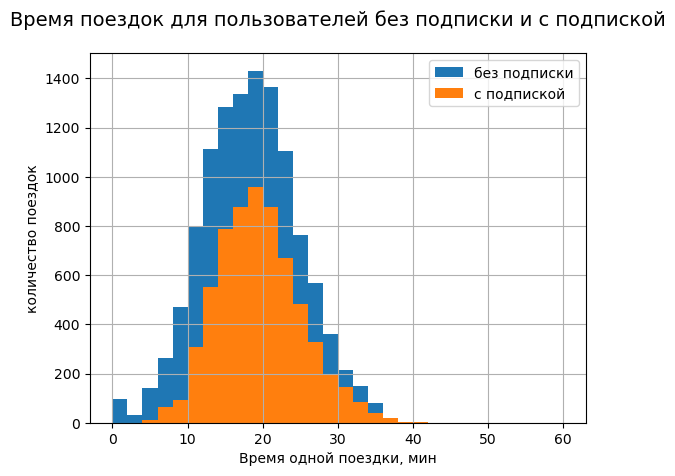

In [27]:
# построим гистограмму (визуализируем информацию о времени поездок для пользователей без подписки и с подпиской)

general_go_fast_free['duration'].hist(bins=30, range = (0, 60), label='без подписки')
general_go_fast_ultra['duration'].hist(bins=30, range = (0, 60), label='с подпиской')
plt.title("Время поездок для пользователей без подписки и с подпиской", fontsize=14, pad=20)
plt.xlabel("Время одной поездки, мин")
plt.ylabel("количество поездок")
plt.legend()
plt.show()


In [28]:
print('Числовое описание данных о времени поездок для пользователей с подпиской')
print(general_go_fast_ultra['duration'].describe())
print()
print('Числовое описание данных о времени поездок для пользователей без подписки')
print(general_go_fast_free['duration'].describe())

Числовое описание данных о времени поездок для пользователей с подпиской
count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Числовое описание данных о времени поездок для пользователей без подписки
count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64


**Промежуточные итоги:** \
Мы создали дополнительно два датафрейма c данными о пользователях без подписки и с подпиской, в которых отобржена текущая инфрмация о пользователях, их поездках. И выяснили, что пользователи без подписки гораздо чаще пользуются сервисом (т.е. у них гораздо больше поездок - больше преодолевают расстояний и гораздо дольше дляться их поездки).

### Шаг 5. Подсчёт выручки

In [29]:
# найдем суммарное расстояние, количество поездок, суммарное время для каждого пользователя за каждый месяц
aggregated_general_go_fast = (
    general_go_fast.pivot_table(index=['user_id', 'month'], values=['distance', 'duration'] , 
                                aggfunc=['sum', 'count']))

#сбросим индексы у сводной таблице
aggregated_general_go_fast = aggregated_general_go_fast.reset_index()

#удалим двухуровневые колонки у сводной таблицы
aggregated_general_go_fast.columns = aggregated_general_go_fast.columns.droplevel(0)

#присвоим новые названия столбцам сводной таблицы
aggregated_general_go_fast.columns = ['user_id', 'month', 'sum_distance', 'sum_duration', 'count_drive', 'count_drive1']

# удалим задвоенный столбец у сводной таблицы
del aggregated_general_go_fast['count_drive1']

# выведем получившуюся таблицу
display(aggregated_general_go_fast)

,user_id,month,sum_distance,sum_duration,count_drive
0,1,1,7028.0,42.0,2
1,1,4,755.0,7.0,1
2,1,8,6724.0,46.0,2
3,1,10,5811.0,32.0,2
4,1,11,7005.0,56.0,3
...,...,...,...,...,...
11326,1534,6,3411.0,26.0,2
11327,1534,8,7623.0,48.0,2
11328,1534,9,4929.0,23.0,1
11329,1534,11,13353.0,78.0,4


In [30]:
# в сводную таблицу aggregated_general_go_fast добавим данные о пользователе из users_go, subscriptions_go
aggregated_general_go_fast_type = (aggregated_general_go_fast
                   .merge(users_go, on='user_id', how='left')
                   .merge(subscriptions_go, on='subscription_type', how='left')
                         )                          

# выведем получившуюся таблицу
display(aggregated_general_go_fast_type)
             

,user_id,month,sum_distance,sum_duration,count_drive,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7028.0,42.0,2,Кира,22,Тюмень,ultra,6,0,199
1,1,4,755.0,7.0,1,Кира,22,Тюмень,ultra,6,0,199
2,1,8,6724.0,46.0,2,Кира,22,Тюмень,ultra,6,0,199
3,1,10,5811.0,32.0,2,Кира,22,Тюмень,ultra,6,0,199
4,1,11,7005.0,56.0,3,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3411.0,26.0,2,Альберт,25,Краснодар,free,8,50,0
11327,1534,8,7623.0,48.0,2,Альберт,25,Краснодар,free,8,50,0
11328,1534,9,4929.0,23.0,1,Альберт,25,Краснодар,free,8,50,0
11329,1534,11,13353.0,78.0,4,Альберт,25,Краснодар,free,8,50,0


In [31]:
# функция расчета помесячной выручкой, которую принёс каждый пользователь
def revenue_calculation(row):
    count = row['count_drive']
    summ = row['sum_duration']
    minute = row['minute_price']
    start = row['start_ride_price']
    subscription = row['subscription_fee']
    return((start * count + minute * summ + subscription))


In [32]:
# добавим столбец с помесячной выручкой, которую принёс каждый пользователь в aggregated_general_go_fast_type
aggregated_general_go_fast_type['revenue'] = aggregated_general_go_fast_type.apply(revenue_calculation, axis=1)

In [33]:
# выведем получившуюся таблицу
display(aggregated_general_go_fast_type)

,user_id,month,sum_distance,sum_duration,count_drive,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7028.0,42.0,2,Кира,22,Тюмень,ultra,6,0,199,451.0
1,1,4,755.0,7.0,1,Кира,22,Тюмень,ultra,6,0,199,241.0
2,1,8,6724.0,46.0,2,Кира,22,Тюмень,ultra,6,0,199,475.0
3,1,10,5811.0,32.0,2,Кира,22,Тюмень,ultra,6,0,199,391.0
4,1,11,7005.0,56.0,3,Кира,22,Тюмень,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3411.0,26.0,2,Альберт,25,Краснодар,free,8,50,0,308.0
11327,1534,8,7623.0,48.0,2,Альберт,25,Краснодар,free,8,50,0,484.0
11328,1534,9,4929.0,23.0,1,Альберт,25,Краснодар,free,8,50,0,234.0
11329,1534,11,13353.0,78.0,4,Альберт,25,Краснодар,free,8,50,0,824.0


**Промежуточные итоги:** \
Получили сводную таблицу с суммарными расстояниями, количеством поездок, суммарным временем, суммарной выручкой для каждого пользователя за каждый месяц.

### Шаг 6. Проверка гипотез

**6.1. Тратят ли пользователи с подпиской больше времени на поездки?**

Гипотеза H0: Пользователи с подпиской и без подписки тратят в среднем одинаковое время на поездки. 

Гипотеза H1: Пользователи с подпиской тратят в среднем больше времени на поезки, чем без подписки.
Будем использовать исходные данные о продолжительности каждой сессии — отдельно для подписчиков (general_go_fast_ultra) и тех, у кого нет подписки (general_go_fast_free).

In [34]:
# задаем уровень статистической значимости
alpha = 0.05 

# проведем тест и посчитаем p-значение
results = st.ttest_ind(general_go_fast_ultra['duration'], general_go_fast_free['duration'], equal_var = False, alternative='greater')

# выведем на экран полученное p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:# сравним p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу о равенстве среднего времени поезки')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего времени поездки')
    
print()    
print('Средние значения продолжительности поездок для пользователей с подпиской =', general_go_fast_ultra['duration'].mean().round()) 
print('Средние значения продолжительности поездок для пользователей без пдпиской =', general_go_fast_free['duration'].mean().round())

p-значение: 1.1814679253701353e-36
Отвергаем нулевую гипотезу о равенстве среднего времени поезки

Средние значения продолжительности поездок для пользователей с подпиской = 19.0
Средние значения продолжительности поездок для пользователей без пдпиской = 18.0


**Промежуточные выводы:** \
Полученное значение p-value намного меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.

**6.2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3 130 метров?**

Гипотеза H0: Cреднее расстояние за одну поездку, которое проезжают пользователи с подпиской равно 3 130 м. 

Гипотеза H1: Пользователи с подпиской проезжают за одну поездку в среднем расстояние больше 3 130 м.

In [35]:
# расстояние одной поездки, которое оптимальное с точки зрения износа самоката
interested_value = 3130

# уровень статистической значимости
alpha = 0.05 
  
# проведем тест и посчитаем p-значение
results = st.ttest_1samp(
    general_go_fast_ultra['distance'],
    interested_value,  alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9120422337080507
Не получилось отвергнуть нулевую гипотезу


**Промежуточные выводы:** \
Получается, что по всей видимости, пользователи с подпиской действительно проезжают расстояние не превышающее 3 130 м.

**6.3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**

Гипотеза H0: Cредняя помесячная выручка пользователей с подпиской равна средней выручки пользователей без подписки. 

Гипотеза H1: Cредняя помесячная выручка пользователей с подпиской выше, чем средняя выручка пользователей без подписки. 

In [36]:
# сделаем срезы по типу подписки
ultra = aggregated_general_go_fast_type.query('subscription_type == "ultra"') 
free = aggregated_general_go_fast_type.query('subscription_type == "free"') 

In [37]:
# задаем уровень статистической значимости
alpha = 0.05 

# проведем тест и посчитаем p-значение
results = st.ttest_ind(ultra['revenue'], free['revenue'], equal_var = False, alternative='greater')

# выведем на экран полученное p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:# сравним p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу о равенстве средней помесячной выручки для пользователей с подпиской или без')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве средней помесячной выручки для пользователей с подпиской или без')
    
print()    
print('Средние значения помесячной выручки для категории пользователей с подпиской =', ultra['revenue'].mean().round()) 
print('Средние значения помесячной выручки для пользователей без подпиской =', free['revenue'].mean().round())    

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу о равенстве средней помесячной выручки для пользователей с подпиской или без

Средние значения помесячной выручки для категории пользователей с подпиской = 363.0
Средние значения помесячной выручки для пользователей без подпиской = 329.0


**Промежуточные выводы:** \
Полученное значение p-value намного меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**6.4. Вопрос**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: Для проведения теста нужно использовать метод scipy.stats.ttest_rel(). 

### ШАГ 7. ИТОГИ

Мы провели работу с данными сервиса аренды самокатов GoFast - данные о некоторых пользователях из нескольких городов, а также об их поездках. На этапе предобработки данных мы преобразовали тип данных, проверили на наличие пропущенных значений, устранили дубликаты. На этапе исследовательского анализа данных мы строили графики, определяли и интерпретировали взаимосвязи данных о пользователях и их поездках. Рассчитали суммарное расстояние, количество поездок, суммарное время, помесячную выручку для каждого пользователя за каждый месяц. Проверили ряд гипотез.

И пришли к следующим выводам после проделанной работы:\
. пользователи с подпиской являются более выгодными для компании, так как помесячная выручка от этих пользователей выше (в т.ч. они больше времени тратят на поездки);\
. пользователей без подписки больше, чем с подпиской. И эти пользователи охотнее пользуются сервисом.

Мы рекомендуем обратить внимание:\
. часть данных было задвоенно;\
. возможно данные о расстоянии, которое пользователь преодолел за одну поездку, не в порядке;\
. и конечно обратить на то, что большинство гораздо чаще пользуются сервисом и по какой-то причине не оформляют подписку.